# Aufgabe - Recommendersystem bauen anhand von Produktbeschreibungen

Das Datenset besteht aus 500 echten Produkten aus dem Produktkatalog einer Outdoor-Bekleidungsmarke. Dieses lässt sich sehr gut für ein Produktempfehlungssystem verwenden, ähnlich bei Amazon "Kunden, die kauften, kauften auch." oder "Kunden, die dieses Produkt angesehen haben, haben auch dieses Produkt angeschaut."


Der Datensatz enthält lediglich zwei Spalten:
  - eine Nummer zur eindeutigen Identifikation des Produkts
  - Beschreibung des Produkts aus dem Produktkatalog

## Inhaltsverzeichnis

[Aufgabe 1: Exploration Datenset](#exploration)<br>
[Aufgabe 2: Daten aufbereiten](#dataProcessing)<br>
[Aufgabe 3: Produktcluster identifizieren](#clustering)<br>
[Aufgabe 4: Recommender System bauen](#recommender)<br>

Installation aller empfohlenen Libraries. Es handelt sich hier um eine Empfehlung. Zur Lösung der Aufgabe dürfen auch anderweitige Libraries verwendet werden. 😉

In [ ]:
# Import von python libraries
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install wordcloud

## 1. Exploration Datenset<a id='exploration'></a>

In [ ]:
# Importieren der pandas lib
import pandas as pd

In [ ]:
# Einlesen der csv Datei sample-data.csv (Tipp: Verwendet den Parameter index_col um die vorhanden ID als Index festzulegen)
df = pd.read_csv('sample-data.csv')

In [ ]:
# Verwende die Methoden DataFrame.info(), DataFrame.head() um euch die Daten anzeigen zu lassen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   description  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [ ]:
# Gebe eine komplette description aus, was fällt auf?
print(df.loc[2, 'description'])

Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently and dries fast"</li> <li>Seamless construction</li> <li>Leg openings have half-inch self-binding for comfort</li> <li>Fly-free support</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Program"<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in Israel.


## 2. Daten aufbereiten <a id='dataProcessing'></a>
##### Datenbereinigung:
- Entfernen von HTML-Tags
- Entfernen von überflüssigen Leerzeichen (zur besseren Lesbarkeit für den Menschen 😉)
- Entfernen von Sonderzeichen

In [ ]:
# Erstelle hier die Methoden, die dazu dienen...
# - ...HTML-Tags aus einem Text zu entfernen.
# - ...überflüssige Leerzeichen zu entfernen.
# - ...Sonderzeichen und Zahlen zu entfernen.
# Tipp: Nutze Regular Expressions (RegEx)

import re
def remove_html_tags(text):
    return re.sub('<[^>]*>', ' ', text)

def remove_empty_spaces(text):
    return re.sub(' +', ' ', text)

def remove_sonderzeichen(text):
    return re.sub('[^A-Za-z\s]+', '', text)

In [ ]:
# Transformiere die Spalte 'description' indem die apply() Funktion vom dataframe genutzt wird.
# Entferne die HTML Tags und lasse dir die Description danach ausgeben.
# Tipp: Nutze am besten eine neue Spalte um Vorher/Nachher Ergebnisse zu sehen.
df['clean_description'] = df['description'].apply(lambda x: remove_html_tags(x))
print(df.loc[2, 'clean_description'])

Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.   Details:    "Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently and dries fast"   Seamless construction   Leg openings have half-inch self-binding for comfort   Fly-free support     Fabric:  "4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Program"   Weight:  (49 g 1.7 oz)  Made in Israel.


In [ ]:
# Entferne die überflüssigen Leerzeichen und lasse dir die Description danach ausgeben.
df['clean_description'] = df['clean_description'].apply(lambda x: remove_empty_spaces(x))
print(df.loc[2, 'clean_description'])

Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program. Details: "Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently and dries fast" Seamless construction Leg openings have half-inch self-binding for comfort Fly-free support Fabric: "4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Program" Weight: (49 g 1.7 oz) Made in Israel.


In [ ]:
# Entferne Sonderzeichen und Zahlen und lasse dir die Description danach ausgeben.
df['clean_description'] = df['clean_description'].apply(lambda x: remove_sonderzeichen(x))
print(df.loc[2, 'clean_description'])

Active sport briefs  These superbreathable nofly briefs are the minimalists choice for highoctane endeavors Made from a blend of fastwicking quickdrying  polyester  recycled and  spandex that has both stretchmesh for support and open mesh for cooling airflow Soft edging at the leg openings and a seamless waist wont roll or create friction against layers With a smooth front panel for opacity Recyclable through the Common Threads Recycling Program Details Stretch mesh provides support openweave mesh for airflow wicks efficiently and dries fast Seamless construction Leg openings have halfinch selfbinding for comfort Flyfree support Fabric oz  polyester  recycled spandex with moisturewicking performance Recyclable through the Common Threads Recycling Program Weight  g  oz Made in Israel


In [ ]:
# Für NLP ist es wichtig, dass die Wörter alle kleingeschrieben sind. Transformiere also alle in lower-CASE.
df['clean_description'] = df['clean_description'].str.lower()
print(df.loc[2, 'clean_description'])

active sport briefs  these superbreathable nofly briefs are the minimalists choice for highoctane endeavors made from a blend of fastwicking quickdrying  polyester  recycled and  spandex that has both stretchmesh for support and open mesh for cooling airflow soft edging at the leg openings and a seamless waist wont roll or create friction against layers with a smooth front panel for opacity recyclable through the common threads recycling program details stretch mesh provides support openweave mesh for airflow wicks efficiently and dries fast seamless construction leg openings have halfinch selfbinding for comfort flyfree support fabric oz  polyester  recycled spandex with moisturewicking performance recyclable through the common threads recycling program weight  g  oz made in israel


##### Tokenisierung
Im nächsten Schritt kommen wir zur Tokenisierung, dieser ist ein grundlegender Schritt in der Textvorverarbeitung im Bereich NLP. Sie hilft dabei, einen unstrukturierten Text in einzelne Token oder Wörter zu zerlegen, was die anschließende Analyse und Verarbeitung enorm erleichtert.

In [ ]:
# Tokenisiere die bereinigte Produktbeschreibung. Nutze auch hier die apply() Funktion.
import nltk
from nltk.tokenize import word_tokenize

# Lädt Ressourcen für nltk herunter:
nltk.download('punkt')

# Beschreibungen der Produkte tokenisieren
df['tokens'] = df['clean_description'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,description,clean_description,tokens
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our...,"[active, classic, boxers, theres, a, reason, w..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory r...,"[active, sport, boxer, briefs, skinning, up, g..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nof...,"[active, sport, briefs, these, superbreathable..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch t...,"[alpine, guide, pants, skin, in, climb, ice, s..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and ...,"[alpine, wind, jkt, on, high, ridges, steep, i..."


##### Stopwörter
Stoppwörter sind häufig vorkommende Wörter wie "und", "oder", "aber" usw., die wenig zur Bedeutung des Textes beitragen, aber dennoch in vielen Texten erscheinen. Durch die Entfernung von Stoppwörtern wird der Text von irrelevanten Wörtern befreit, was die Qualität der weiteren Analyse verbessert.

In [ ]:
# Laden der englischen Stopwortliste
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Schreibe hier eine Methode, die Stoppwörter entfernt. Als Eingabe wir die liste der Tokens übergeben.
def remove_stopwords(words):
    # Filtern der Stopwörter aus dem Text
    filtered_text = [word for word in words if word.lower() not in stop_words]

    # Konvertieren der gefilterten Wörter zurück in einen Text
    return filtered_text

In [ ]:
# Stoppwörter aus den Produktbeschreibungen entfernen.
df['purified_description'] = df['tokens'].apply(lambda x: remove_stopwords(x))
df.head()

,id,description,clean_description,tokens,purified_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our...,"[active, classic, boxers, theres, a, reason, w...","[active, classic, boxers, theres, reason, boxe..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory r...,"[active, sport, boxer, briefs, skinning, up, g...","[active, sport, boxer, briefs, skinning, glory..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nof...,"[active, sport, briefs, these, superbreathable...","[active, sport, briefs, superbreathable, nofly..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch t...,"[alpine, guide, pants, skin, in, climb, ice, s...","[alpine, guide, pants, skin, climb, ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and ...,"[alpine, wind, jkt, on, high, ridges, steep, i...","[alpine, wind, jkt, high, ridges, steep, ice, ..."


In [ ]:
# Lasst euch den Unterschied nach der Entfernung der Stoppwörter ausgeben
tokens_set = set(df.loc[2, 'tokens'])
purified_set = set(df.loc[2, 'purified_description'])

difference = tokens_set - purified_set
print("Entfernte Stoppwörter:", list(difference))

Entfernte Stoppwörter: ['a', 'these', 'the', 'that', 'against', 'with', 'and', 'both', 'or', 'have', 'through', 'in', 'for', 'are', 'of', 'has', 'from', 'at']


## 3. Produktcluster identifizieren <a id='clustering'></a>

In [ ]:
# Für die weitere Verarbeitung brauchen wir die Liste als String:
df["purified_description"] = [" ".join(x) for x in df['purified_description']]
df.head()

,id,description,clean_description,tokens,purified_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our...,"[active, classic, boxers, theres, a, reason, w...",active classic boxers theres reason boxers cul...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory r...,"[active, sport, boxer, briefs, skinning, up, g...",active sport boxer briefs skinning glory requi...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nof...,"[active, sport, briefs, these, superbreathable...",active sport briefs superbreathable nofly brie...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch t...,"[alpine, guide, pants, skin, in, climb, ice, s...",alpine guide pants skin climb ice switch rock ...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and ...,"[alpine, wind, jkt, on, high, ridges, steep, i...",alpine wind jkt high ridges steep ice anything...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Nutze das TD-IDF Modell und vektorisiere die Beschreibung.
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["purified_description"])

X = X.toarray()
print(X.shape)

# Wir haben also 4942 Wörter (Tokens), die in den Texten vorkommen.

(500, 4939)


In [ ]:
# Lasst euch die ersten 50 Wörter/Tokens anzeigen... 😊
print(sorted(vectorizer.vocabulary_.items())[:50])

[('ab', 0), ('abandon', 1), ('ability', 2), ('able', 3), ('aboveknee', 4), ('abovetheknee', 5), ('abrasion', 6), ('abrasionresistance', 7), ('abrasionresistant', 8), ('abrasive', 9), ('abroad', 10), ('absolute', 11), ('absorbs', 12), ('absorption', 13), ('abstract', 14), ('abuse', 15), ('abusive', 16), ('ac', 17), ('accentuate', 18), ('access', 19), ('accessed', 20), ('accesses', 21), ('accessibility', 22), ('accessories', 23), ('accessory', 24), ('accommodate', 25), ('accommodates', 26), ('accomplishes', 27), ('according', 28), ('ace', 29), ('achieve', 30), ('achilles', 31), ('act', 32), ('action', 33), ('actioninspired', 34), ('active', 35), ('activefriendly', 36), ('activeminded', 37), ('activities', 38), ('activity', 39), ('acts', 40), ('acutely', 41), ('ad', 42), ('adapt', 43), ('adaptability', 44), ('adaptable', 45), ('adapts', 46), ('add', 47), ('added', 48), ('adding', 49)]


In [ ]:
# Die Wörter müssen jetzt pro Produkt als Spalten aufbereitet werden und ihre Häufigkeit gezählt.
# Ziel ist es als Index die Produktnummerierung zu erhalten und als Spalten die 4942 Tokens mit ihren Counts in den Zeilen der Produkte
X_df = pd.DataFrame(X,
                    columns=vectorizer.get_feature_names_out(),
                    index=["product_{}".format(x) for x in range(df.shape[0])] )

X_df.head()

,ab,abandon,ability,able,aboveknee,abovetheknee,abrasion,abrasionresistance,abrasionresistant,abrasive,...,zipper,zippered,zipperedorganizer,zippers,zipping,zippocket,zips,zipsecurity,zipthrough,zones
product_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
product_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
product_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
product_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.246224,0.0,0.075351,0.0,0.0,0.0,0.0,0.0,0.0
product_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090586,0.036094,0.0,0.055229,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Nutzt DBSCAN um Produktcluser zu bilden.

from sklearn.cluster import DBSCAN

# Produktcluster definieren.
clustering = DBSCAN(eps=0.7, min_samples=3, metric="cosine", algorithm="brute")

# Cluster bilden
clustering.fit(X)

# Schreibe die Cluster-IDs in deine Dataframes
df['cluster_id'] = clustering.labels_
display(df.head())
X_df['cluster_id'] = clustering.labels_
display(X_df.head())

,id,description,clean_description,tokens,purified_description,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our...,"[active, classic, boxers, theres, a, reason, w...",active classic boxers theres reason boxers cul...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory r...,"[active, sport, boxer, briefs, skinning, up, g...",active sport boxer briefs skinning glory requi...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nof...,"[active, sport, briefs, these, superbreathable...",active sport briefs superbreathable nofly brie...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch t...,"[alpine, guide, pants, skin, in, climb, ice, s...",alpine guide pants skin climb ice switch rock ...,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and ...,"[alpine, wind, jkt, on, high, ridges, steep, i...",alpine wind jkt high ridges steep ice anything...,1


,ab,abandon,ability,able,aboveknee,abovetheknee,abrasion,abrasionresistance,abrasionresistant,abrasive,...,zippered,zipperedorganizer,zippers,zipping,zippocket,zips,zipsecurity,zipthrough,zones,cluster_id
product_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
product_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1
product_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1
product_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.246224,0.0,0.075351,0.0,0.0,0.0,0.0,0.0,0.0,1
product_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036094,0.0,0.055229,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Gebe dir mal die Cluster aus und die Produkte, die dorthin einsortiert wurden.
df['cluster_id'].value_counts()

cluster_id
 1     129
-1      81
 5      56
 0      39
 12     24
 2      21
 10     20
 21     15
 4      14
 18      9
 3       9
 24      8
 8       8
 19      7
 11      6
 15      6
 16      5
 17      5
 26      5
 13      4
 9       4
 22      4
 23      4
 25      4
 14      4
 20      3
 7       3
 6       3
Name: count, dtype: int64

In [ ]:
# Lasse dir 5 Beispiele für das Cluster 2 ausgeben.
df.loc[df['cluster_id']==2].head()

,id,description,clean_description,tokens,purified_description,cluster_id
6,7,"Atom - A multitasker's cloud nine, the Atom pl...",atom a multitaskers cloud nine the atom plays...,"[atom, a, multitaskers, cloud, nine, the, atom...",atom multitaskers cloud nine atom plays part c...,2
30,31,"Crosstown - Crosstown or cross-country, this f...",crosstown crosstown or crosscountry this full...,"[crosstown, crosstown, or, crosscountry, this,...",crosstown crosstown crosscountry fully feature...,2
41,42,Freewheeler - This sturdy wheeled bag holds a ...,freewheeler this sturdy wheeled bag holds a w...,"[freewheeler, this, sturdy, wheeled, bag, hold...",freewheeler sturdy wheeled bag holds weeks wor...,2
82,83,Lw travel duffel - This wanderer's bag is larg...,lw travel duffel this wanderers bag is large ...,"[lw, travel, duffel, this, wanderers, bag, is,...",lw travel duffel wanderers bag large enough ho...,2
83,84,Lw travel pack - In the lifelong search for a ...,lw travel pack in the lifelong search for a p...,"[lw, travel, pack, in, the, lifelong, search, ...",lw travel pack lifelong search place call home...,2


In [ ]:
# Gebe dir drei Beispielprodukte aus dem Cluster 2 aus.
cluster_id = 2
print("Produktkategorie ", cluster_id , ':')
for d in df.loc[df['cluster_id']==cluster_id,:].sample(3)['clean_description']:
    print(d)
    print()

Produktkategorie  2 :
hip pack  entrusted with holding our essentials this little pack has big responsibilities designed for hiking biking and travel it features a zippered main compartment and small hanging mesh pocket with a key retainer d spacermesh panels to wick perspiration a narrow waist strap and waterresistant zippers made from denier doubleweave polyester  recycled thats coated with polyurethane and has a dwr durable water repellent finish details zippered main compartment holds the goods hanging mesh pocket for small items key retainer d spacermesh panel at hips cushions wicks moisture dries quickly and allows air circulation narrow waistbelt is comfortable and unobtrusive waterresistant zippers fabric oz denier  allrecycled polyester double weave lining oz denier  polyester both with polyurethane coating and a dwr durable water repellent finish weight  g  oz made in vietnam

atom  a multitaskers cloud nine the atom plays the part of courier bag daypack and carryon its teard

In [ ]:
# Gibt dir die 5 häufigsten Wörter der Produktkategorie 9 aus
cols = [col for col in X_df.columns if col!='cluster_id']
cluster_id = 9

print(f"Produktkategorie {cluster_id} und ihre 5 häufigsten Wörter.")
print(X_df.loc[X_df['cluster_id']==cluster_id,cols].mean(axis=0).sort_values(ascending=False)[0:5])

Produktkategorie 9 und ihre 5 häufigsten Wörter.
pack       0.309996
mesh       0.164380
vest       0.161330
panel      0.142168
harness    0.116957
dtype: float64


Produktkategorie  2


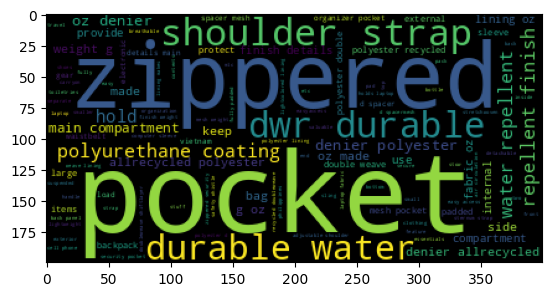


Produktkategorie  4


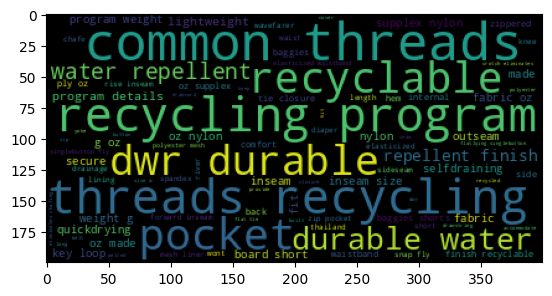


Produktkategorie  5


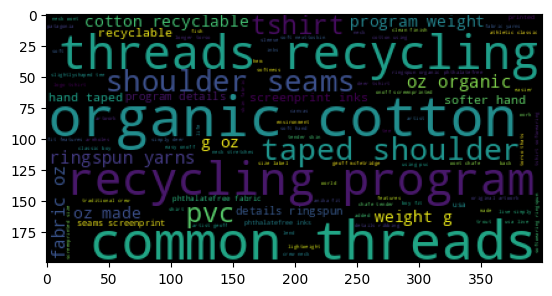


Produktkategorie  9


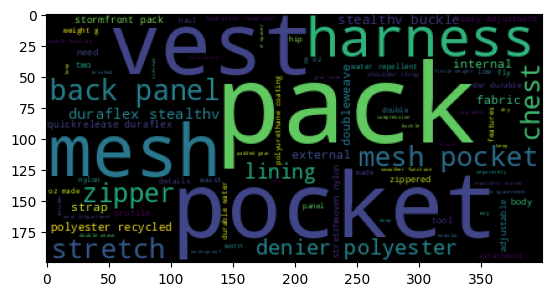

In [ ]:
# Gebe die Wörter als Wordcloud aus. Du kannst gerne ein paar Produktkategorien wählen, die dir sinnvoll erscheinen.
import matplotlib.pyplot as plt
import wordcloud

cluster_ids = [2, 4, 5, 9]

wd = wordcloud.WordCloud()
for cluster_id in cluster_ids:
    print("Produktkategorie ", cluster_id)
    texts = " ".join(df.loc[df['cluster_id']==cluster_id,'clean_description'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print()

## 4. Recommender System bauen <a id='recommender'></a>

In [ ]:
# Schreibe eine Funktion, die dir zu einer item_id 5 ähnliche Produkte ausgibt.

def find_similar_items(item_id):
    cluster_id = df.loc[df['id']==item_id, 'cluster_id'].values[0]
    similar_items = df.loc[df['cluster_id']==cluster_id,:].sample(5)
    similar_item_ids = similar_items['id'].unique()
    return similar_item_ids

In [ ]:
# Hilfsklasse zum farblichen Printen :)
class bcolors:
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'

In [ ]:
# Suche ein Produkt mit dem cluster 9

In [ ]:
product_id = int(input("Welches Produkt würdest du gern kaufen und weitere Empfehlungen erhalten? "))
print()
try:
    print(product_id)
    item_desc = df.loc[df['id']==product_id, 'clean_description'].values[0]
except:
    print('Produkt nicht in der Datenbank gefunden. Bitte geben Sie eine gültige Produkt-ID ein.')
else:
    print(f"{bcolors.OKBLUE}Produkt in der Datenbank gefunden, Beschreibung unten:")
    print(item_desc)
    print()

    print("Basierend auf der Analyse der Produktbeschreibungen könnten Sie auch an folgenden Produkten interessiert sein:")
    print()

    for i in find_similar_items(product_id):
        print(f"{bcolors.OKGREEN}Item #", i)
        print(df.loc[df['id']==i, 'clean_description'].values[0])
        print('--------------------')

Welches Produkt würdest du gern kaufen und weitere Empfehlungen erhalten? 9

9
Produkt in der Datenbank gefunden, Beschreibung unten:
baby micro dluxe cardigan  micro dluxe is a heavenly soft fabric with downtoearth applications this cardigan is made from a quickdrying durable oz  polyester  recycled microdenier fleece that is lightweight and breathable so it can work as a top or midlayer a wind flap backs the zip front while the hood has coveredelastic side trim to bundle babies in deep warmth with slashstyle patch pockets colorcoordinating elbow patches and soft selffabric cuffs recyclable through the common threads recycling program details soft microdenier fleece made from  recycled polyester is durable and quicktodry hood stays secure with covered side elastic inside neck tape for a clean finish handwarmer patch pockets full front zip backed by a wind flap soft selffabric cuffs fabric oz  microdenier polyester  recycled fleece recyclable through the common threads recycling progra